# Secrets of Vinho Verde

This week we will use the power of the **scikit-learn** library to establish which **factors** contribute to a great glass of red wine.

1599 wines were tested by at least 3 wine experts and given a quality grade from **0** (terrible) to **10** (excellent).

There were **11 factors** measured: *fixed acidity*, *volatile acidity*, *citric acid*, *residual sugar*, *chlorides*, *free and total sulphur dioxide*, *density*, *pH*, *sulphates* and *alcohol*.

In [99]:
import pandas as pd

# Load in the red wine data from the UCI ML website.
df_redwine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [100]:
# Take a look
print(df_redwine.head(10))
# Data dimensionality (rows, colums)
print(df_redwine.shape)
# Data distributing
df_redwine.info()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

## Task

In this task, you have to:
1. Split the set in training and testing sets (80-20).
2. Apply the following classification methods:
  * Gaussian Naive Bayes (NB)
  * Decision Tree (DT)
  * K-Nearest Neighbors (KNN)
    * n_neighbors = {3, 5}, 
    * weights = {'uniform', 'distance'}
  * Random Forest (RF)
    * n_estimators = 100

3. Evaluate the quality of each model by computing:
  * Confusion matrix
  * ROC
  * Cross-validation score

**Question:**
Which model/configuration performs better predictions?


In [104]:
#caracteristicas del vino (todo menos la calidad)
X = df_redwine.drop(columns=["quality"])
#resultado de las caracteristicas (calidad)
y = df_redwine["quality"]

In [106]:
from sklearn.model_selection import train_test_split

#dividimos los datos 20% test y 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

## Classification methods:

### Gaussian Naive Bayes (NB)


In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
#entrena modelo
nb.fit(X_train, y_train)
#predicción
y_prediction_nb = nb.predict(X_test)



### Decision Tree (DT)


In [113]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_prediction_dt = dt.predict(X_test)

### K-Nearest Neighbors (KNN)


In [116]:
from sklearn.neighbors import KNeighborsClassifier

y_prediction_knn = []
knn_descriptions = []
weight_values = ['uniform', 'distance']
neighbours_values = [3,5]

for n in neighbours_values:
    for w in weight_values:
        
        knn = KNeighborsClassifier(n_neighbors=n, weights=w)
        knn.fit(X_train, y_train)
        y_prediction_knn.append(knn.predict(X_test))

        knn_descriptions.append(f'KNN (n_neighbors={n}, weights={w})')

        

### Random Forest (RF)


In [119]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_prediction_rf = rf.predict(X_test)

## Methods evaluation:


### Confusion matrix


In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

def confusion_matrix_show(y_test, y_prediction):
    #generar
    cm = confusion_matrix(y_test, y_prediction)
    # mostrar
    sns.heatmap(cm, annot=True)


#### Gaussian Naive Bayes (NB)


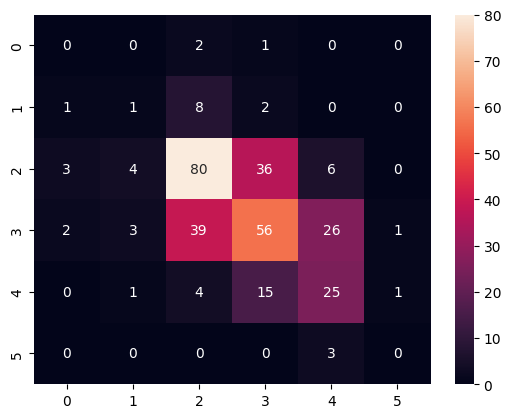

In [126]:
confusion_matrix_show(y_test, y_prediction_nb)

#### Decision Tree (DT)


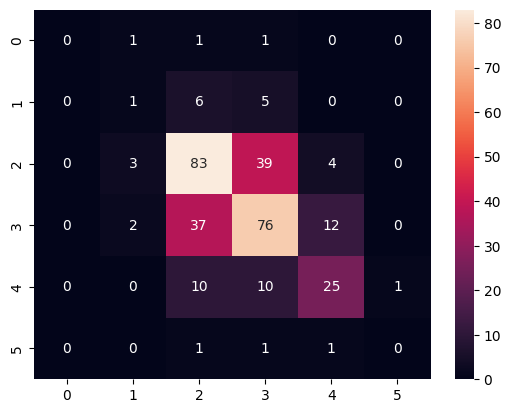

In [129]:
confusion_matrix_show(y_test, y_prediction_dt)

#### K-Nearest Neighbors (KNN)


KNN (n_neighbors=3, weights=uniform)


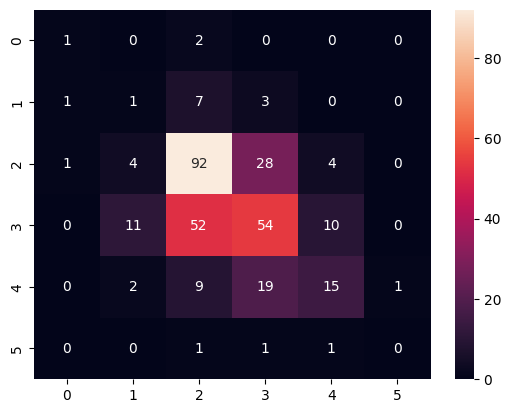

In [143]:
confusion_matrix_show(y_test, y_prediction_knn[0])
print(knn_descriptions[0])

KNN (n_neighbors=3, weights=distance)


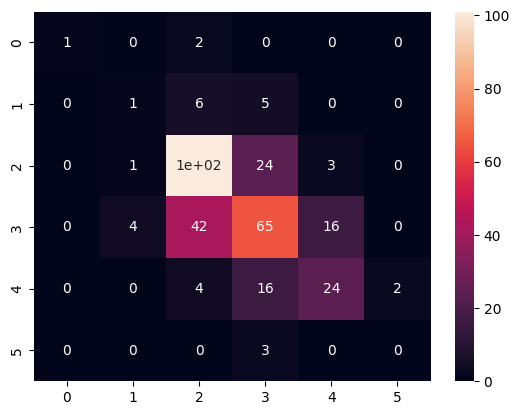

In [145]:
confusion_matrix_show(y_test, y_prediction_knn[1])
print(knn_descriptions[1])

KNN (n_neighbors=5, weights=uniform)


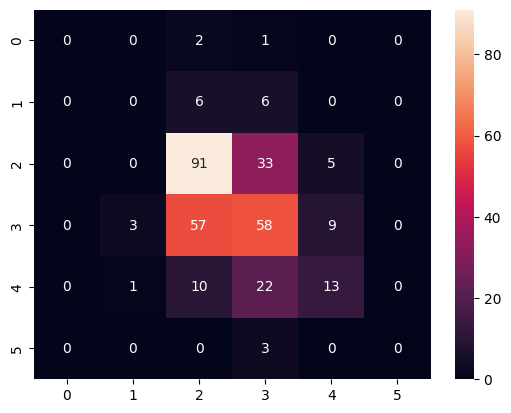

In [147]:
confusion_matrix_show(y_test, y_prediction_knn[2])
print(knn_descriptions[2])

KNN (n_neighbors=5, weights=distance)


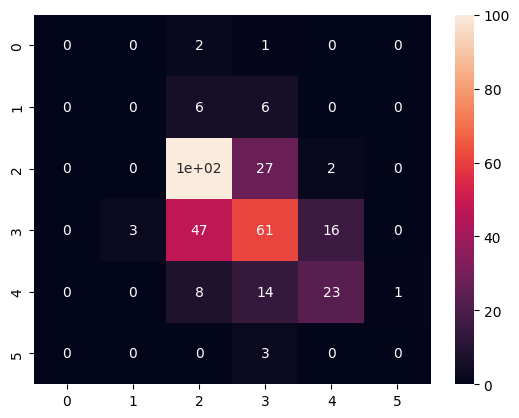

In [149]:
confusion_matrix_show(y_test, y_prediction_knn[3])
print(knn_descriptions[3])

#### Random Forest (RF)


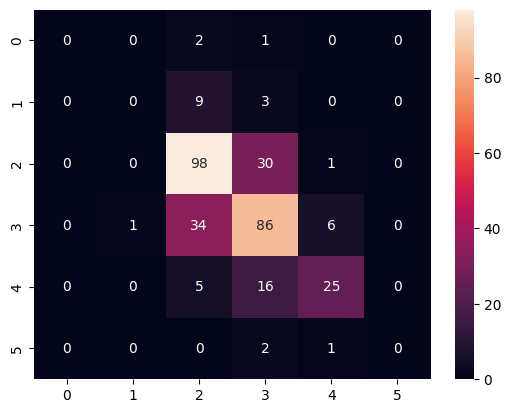

In [151]:
confusion_matrix_show(y_test, y_prediction_rf)

### ROC


In [251]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

def roc_curve_show(model,X_test, y_test):
    # probabilidades de predicción
    y_prob = model.predict_proba(X_test)
    
    #convertir a formato binario => n modelos binarios (One-vs-Rest)
    classes = model.classes_
    y_test_bin = label_binarize(y_test, classes=classes)  
    
    plt.figure(figsize=(8, 6))
    
    for i in range(len(classes)):  # itera cada clase
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        auc_value = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Clase {classes[i]} (AUC = {auc_value:.2f})')
        
    # linea base (random)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # etiquetas y título
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

#### Gaussian Naive Bayes (NB)


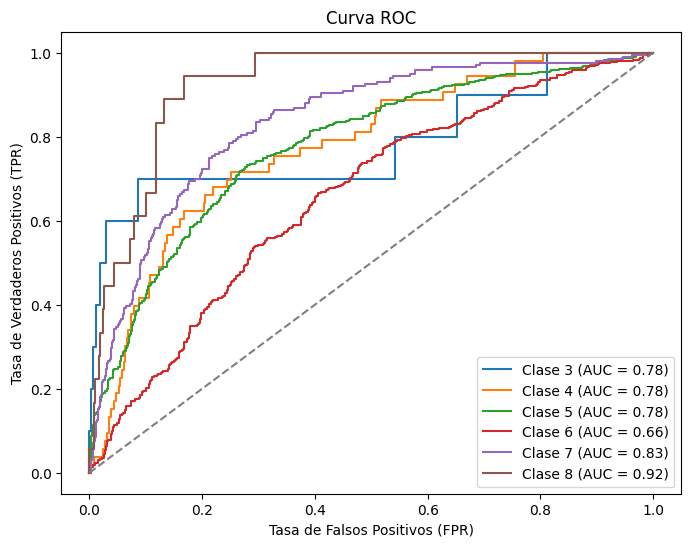

In [254]:
roc_curve_show(nb, X, y)

#### Decision Tree (DT)


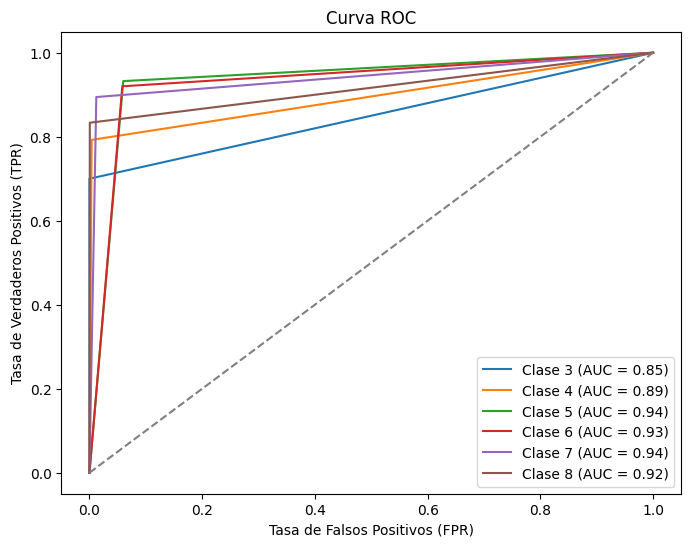

In [257]:
roc_curve_show(dt, X, y)

#### K-Nearest Neighbors (KNN)


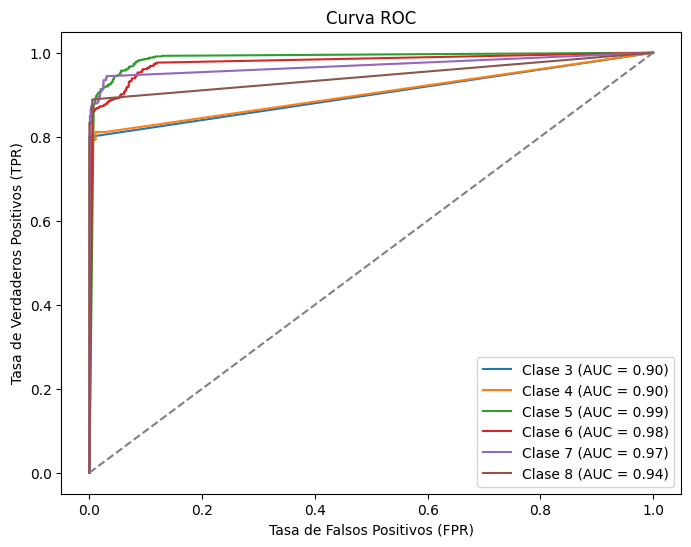

In [260]:
roc_curve_show(knn, X, y)

#### Random Forest (RF)


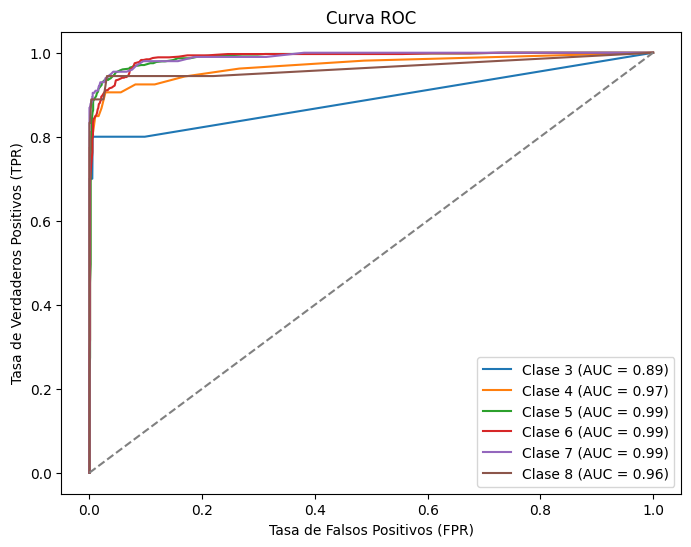

In [263]:
roc_curve_show(rf, X, y)

### Cross-validation score


In [265]:
from sklearn.model_selection import cross_val_score
import numpy as np

def cross_validation_score_show(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    print(f"Precisiones: {scores}")
    print(f"Precisión media: {np.mean(scores):.3f}")
    print(f"Desviación estándar: {np.std(scores):.3f}")

#### Gaussian Naive Bayes (NB)


In [279]:
cross_validation_score_show(nb, X, y)

Precisiones: [0.5125    0.46875   0.58125   0.49375   0.5862069]
Precisión media: 0.528
Desviación estándar: 0.047


#### Decision Tree (DT)


In [282]:
cross_validation_score_show(dt, X, y)

Precisiones: [0.496875   0.4625     0.471875   0.5125     0.46708464]
Precisión media: 0.482
Desviación estándar: 0.019


#### K-Nearest Neighbors (KNN)


In [285]:
cross_validation_score_show(knn, X, y)

Precisiones: [0.484375   0.478125   0.475      0.40625    0.42633229]
Precisión media: 0.454
Desviación estándar: 0.032


#### Random Forest (RF)


In [288]:
cross_validation_score_show(rf, X, y)

Precisiones: [0.534375   0.54375    0.6        0.571875   0.57366771]
Precisión media: 0.565
Desviación estándar: 0.023


## Question:
**Which model/configuration performs better predictions?**

 Random Forest es el mejor modelo basado en estos resultados